In [68]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from bioinfokit.visuz import cluster
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.mixture import GaussianMixture
from bioinfokit.visuz import cluster
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('mcdonalds.csv')
data.head()
d=pd.read_csv('mcdonalds.csv')
d1=pd.read_csv('mcdonalds.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [12]:
data['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [13]:
df1 = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [14]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [15]:
df_encoded = df1.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [16]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [17]:
data.shape

(1453, 15)

In [18]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [19]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.91179298 48.69332668 44.78138456 39.63136078 36.52831435 33.7082743
 32.22832023 29.33600188 27.59057302 21.14107869 19.31862906]
Proportion of Variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [20]:
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


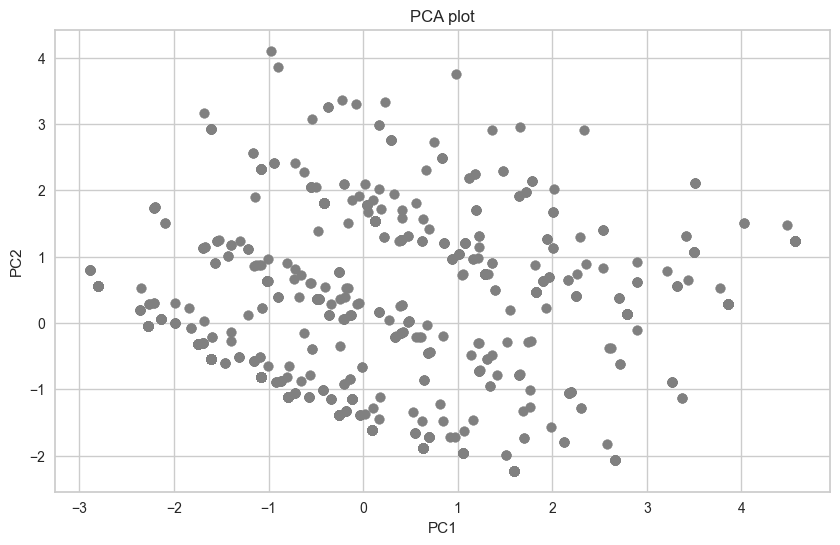

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(pc[:, 0], pc[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [23]:
loadings = pca.components_
num_pc = pca.n_components_
pc_list = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list, index=df_encoded.columns)
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614
healthy,-0.266839,0.201031,0.367814,0.301990,0.051787,-0.446166,-0.449446,-0.446110,0.219269,-0.054544,-0.089903


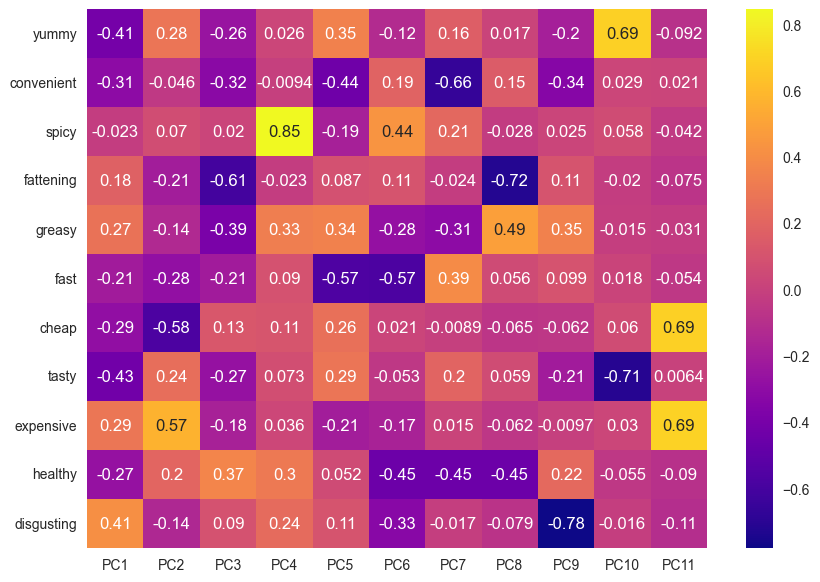

In [24]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

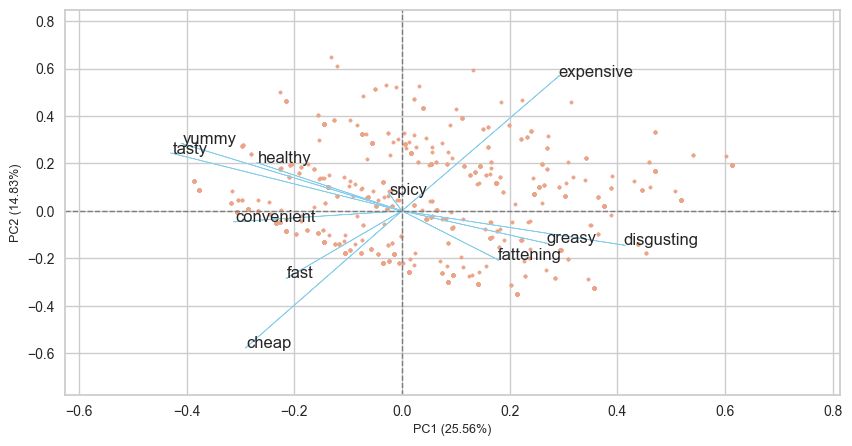

In [25]:
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
data['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)

print ('WCSS:', kmeans.inertia_)

print('No. of iterations: ', kmeans.n_iter_)

print('Cluster centroids: ', kmeans.cluster_centers_)

print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158025
No. of iterations:  9
Cluster centroids:  [[2.70270270e-02 8.47972973e-01 6.08108108e-02 9.05405405e-01
  6.11486486e-01 9.29054054e-01 8.41216216e-01 5.55111512e-16
  5.40540541e-02 8.10810811e-02 4.45945946e-01]
 [5.11627907e-01 8.43551797e-01 9.30232558e-02 9.06976744e-01
  6.19450317e-01 8.01268499e-01 2.11416490e-02 5.60253700e-01
  9.83086681e-01 1.33192389e-01 3.46723044e-01]
 [0.00000000e+00 9.61832061e-01 1.37404580e-01 8.70229008e-01
  5.19083969e-01 9.38931298e-01 8.39694656e-01 1.00000000e+00
  5.34351145e-02 1.45038168e-01 1.75572519e-01]
 [1.00000000e+00 9.81916817e-01 1.01265823e-01 8.11934901e-01
  4.03254973e-01 9.60216998e-01 9.05967450e-01 9.76491863e-01
  5.78661844e-02 3.30922242e-01 6.14828210e-02]]
Cluster size:  Counter({3: 553, 1: 473, 0: 296, 2: 131})


In [27]:
MD_x = data.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = MD_x.mean()

# Round the column means to 2 decimal places
rounded_column_means = column_means.round(2)

print(rounded_column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [28]:
# Set seed for reproducibility
import numpy as np
np.random.seed(1234)

# Perform k-means clustering
inertia_values = []
cluster_labels = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)
    cluster_labels[k] = km.labels_

# Find optimal k using the elbow method
# (here, you might need to visualize the inertia_values to choose the appropriate number of clusters)
optimal_k = 3  # assuming you've determined this from the elbow plot

# Get cluster labels for the optimal number of clusters
optimal_cluster_labels = cluster_labels[optimal_k]

# Relabel clusters if needed
# (not necessary in scikit-learn since cluster labels are already sorted)
# If relabeling is needed, you can perform it manually based on your criteria

# Print cluster labels for the optimal number of clusters
print(optimal_cluster_labels)

[2 1 1 ... 1 0 2]


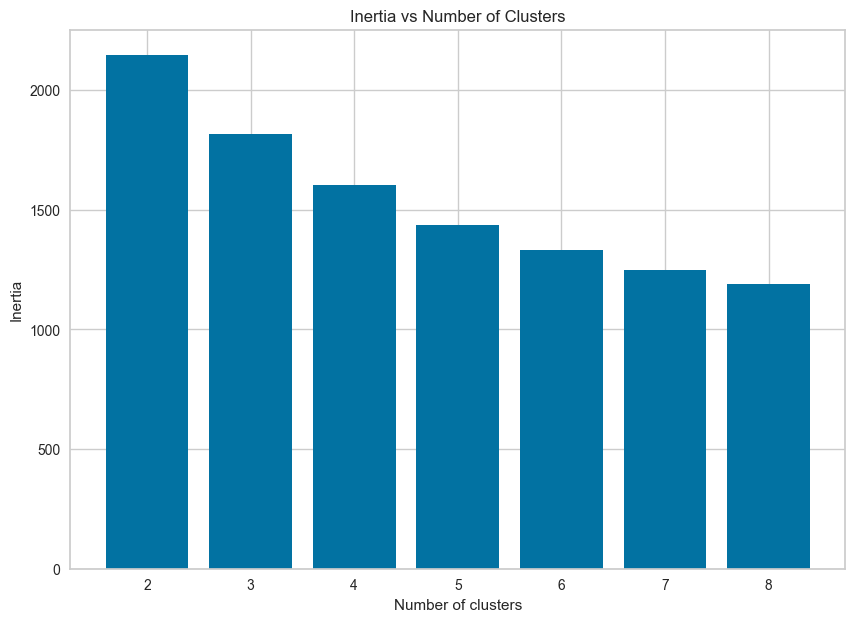

In [29]:
plt.bar(range(2, 9), inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

                  Age  cluster_num
Age          1.000000    -0.144073
cluster_num -0.144073     1.000000


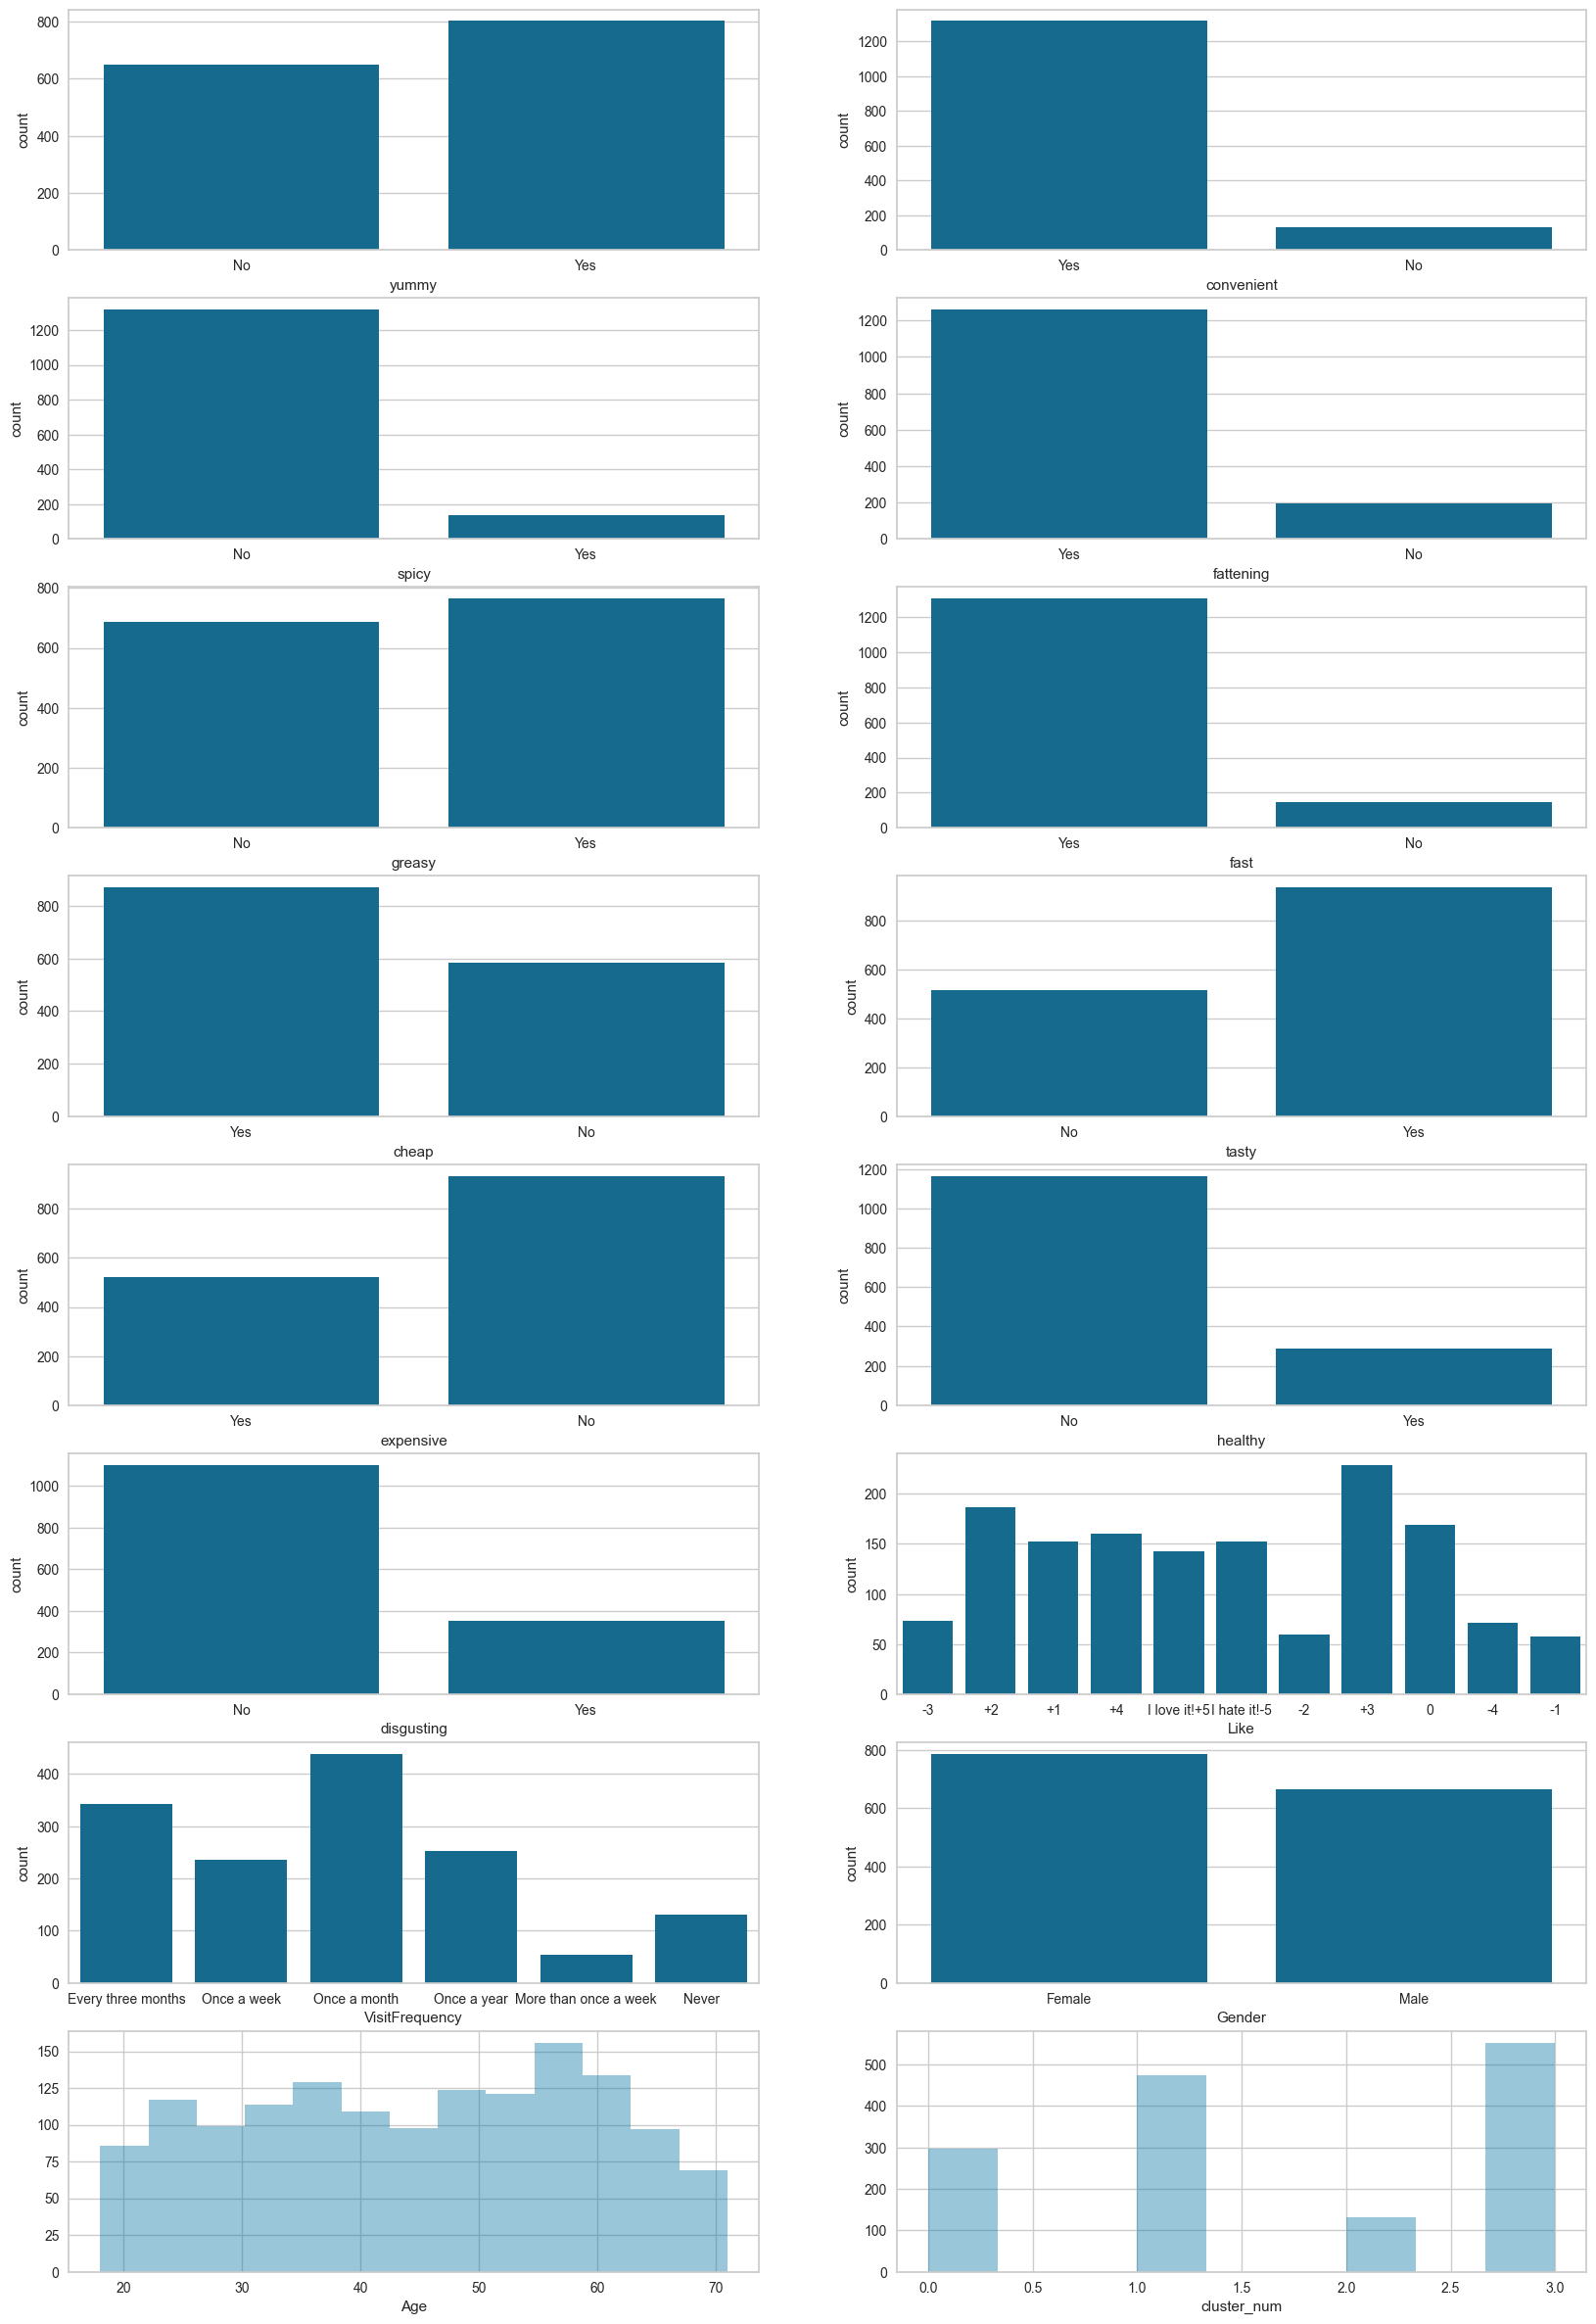

In [30]:
def EDA(data, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((data.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in data.columns:
        if data[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=data, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(data[i].dropna(), kde=False)  # Exclude missing values

    print(data[con].corr())

# Applying the function on the dataset
EDA(data, (20, 30))

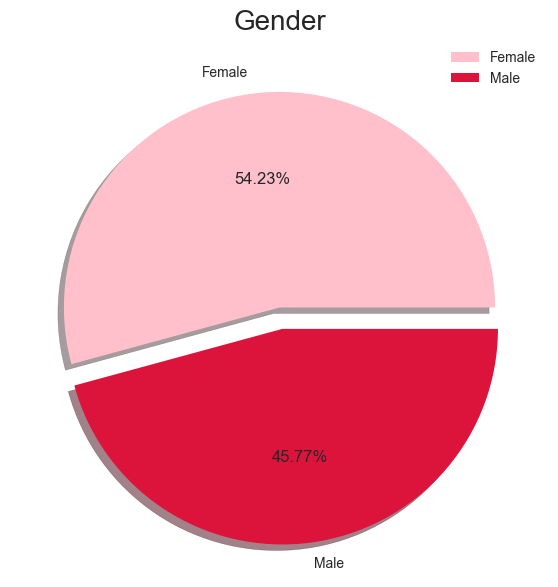

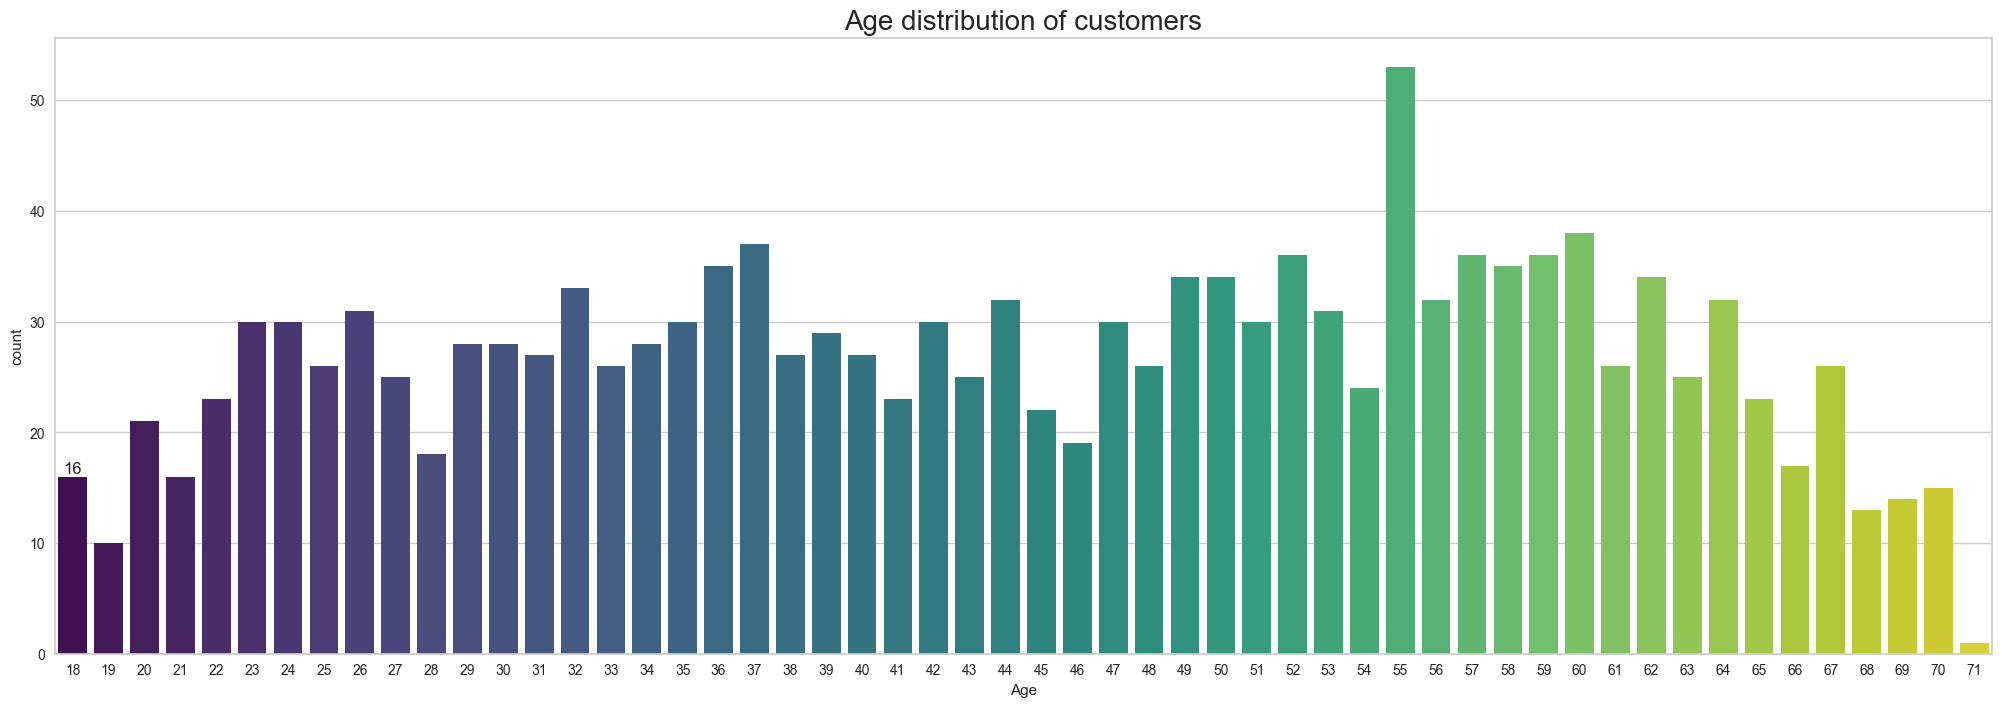

In [31]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=data['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()


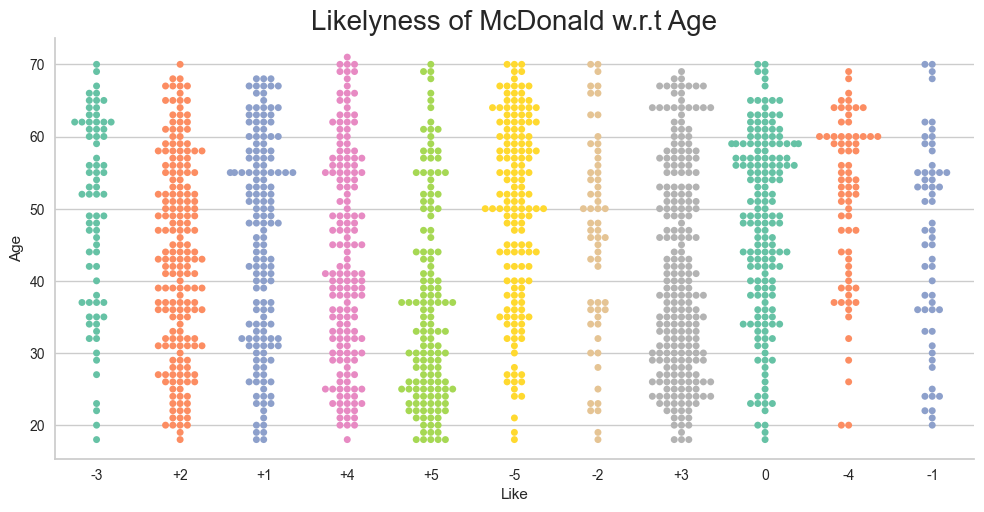

In [32]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

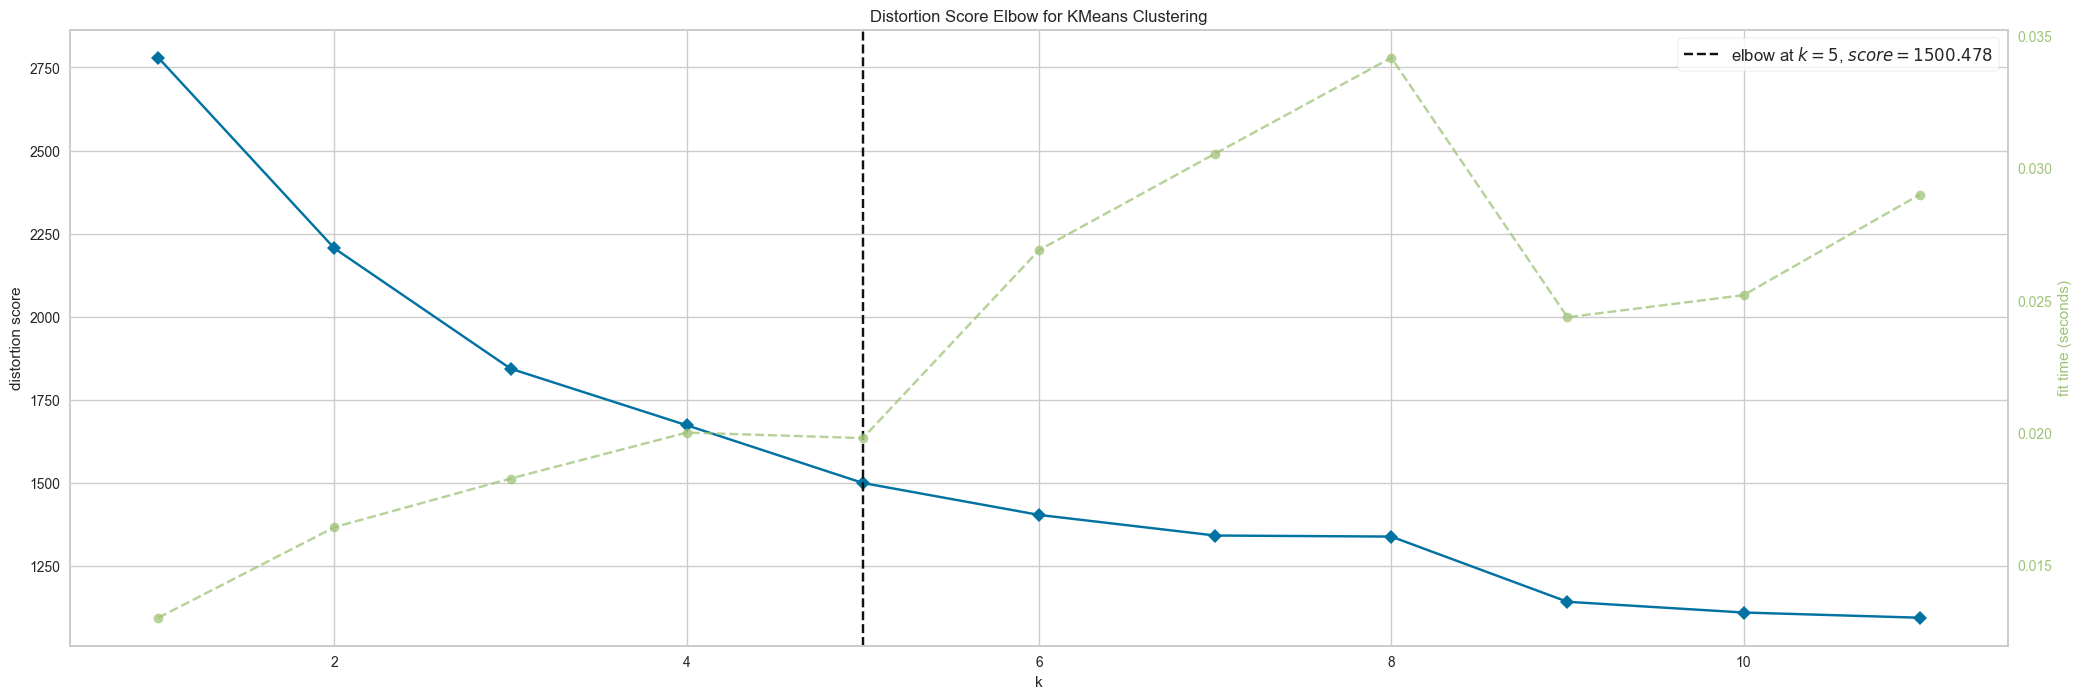

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

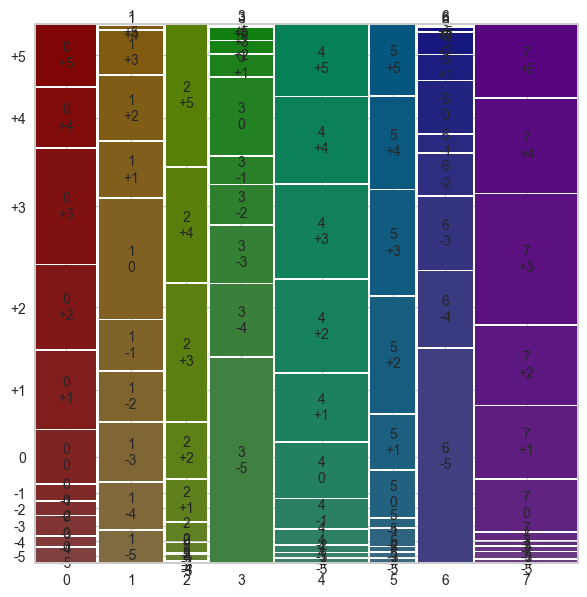

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,6,4,5,17,25,27,37,19,20
1,11,16,20,17,17,41,19,22,15,1,0
2,0,0,1,0,2,4,9,12,30,25,31
3,69,24,19,13,9,26,7,4,4,0,0
4,2,2,3,7,14,27,33,45,46,42,35
5,1,1,1,4,2,11,13,28,25,22,17
6,62,22,21,12,5,15,7,6,1,0,0
7,2,3,2,2,4,28,39,43,71,51,40


None

In [34]:
data['cluster_num'] = km.labels_
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

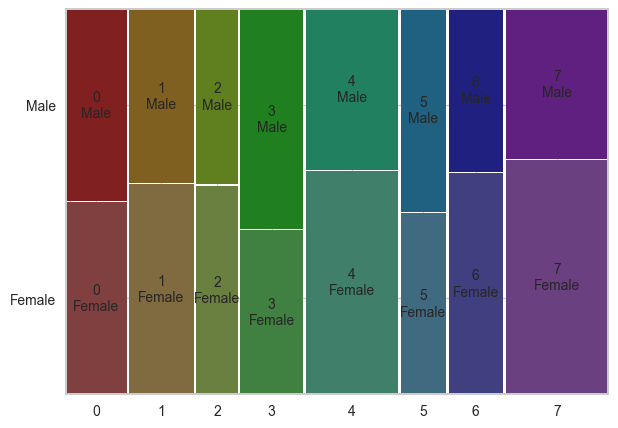

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,6,4,5,17,25,27,37,19,20
1,11,16,20,17,17,41,19,22,15,1,0
2,0,0,1,0,2,4,9,12,30,25,31
3,69,24,19,13,9,26,7,4,4,0,0
4,2,2,3,7,14,27,33,45,46,42,35
5,1,1,1,4,2,11,13,28,25,22,17
6,62,22,21,12,5,15,7,6,1,0,0
7,2,3,2,2,4,28,39,43,71,51,40


None

In [35]:
crosstab_gender = pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

<Axes: xlabel='cluster_num', ylabel='Age'>

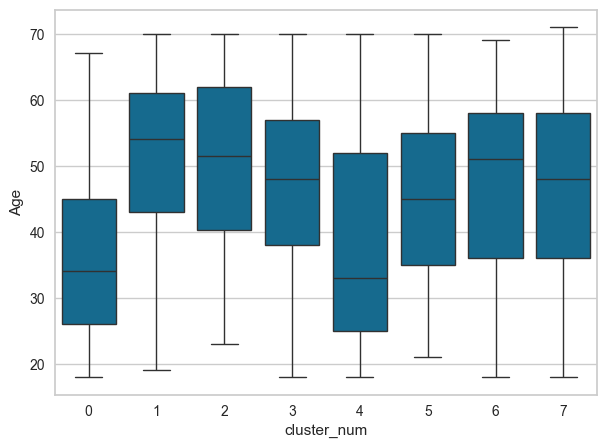

In [36]:
sns.boxplot(x="cluster_num", y="Age", data=data)

In [37]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.583333
1,1,2.692737
2,2,2.491228
3,3,2.674286
4,4,2.656250
5,5,2.648000
6,6,2.774834
7,7,2.578947


In [38]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.583333
1,1,2.692737
2,2,2.491228
3,3,2.674286
4,4,2.656250
5,5,2.648000
6,6,2.774834
7,7,2.578947


In [39]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.380952
1,1,5.692737
2,2,2.877193
3,3,7.662857
4,4,3.281250
5,5,3.040000
6,6,7.523179
7,7,3.038596


In [40]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.500000
1,1,0.452514
2,2,0.456140
3,3,0.571429
4,4,0.417969
5,5,0.528000
6,6,0.423841
7,7,0.389474


In [41]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment


,cluster_num,Gender,Like,VisitFrequency
0,0,0.500000,3.380952,2.583333
1,1,0.452514,5.692737,2.692737
2,2,0.456140,2.877193,2.491228
3,3,0.571429,7.662857,2.674286
4,4,0.417969,3.281250,2.656250
5,5,0.528000,3.040000,2.648000
6,6,0.423841,7.523179,2.774834
7,7,0.389474,3.038596,2.578947


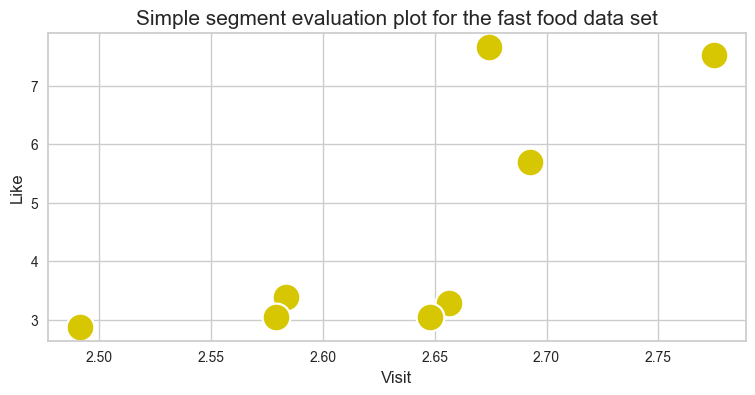

In [42]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="y")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

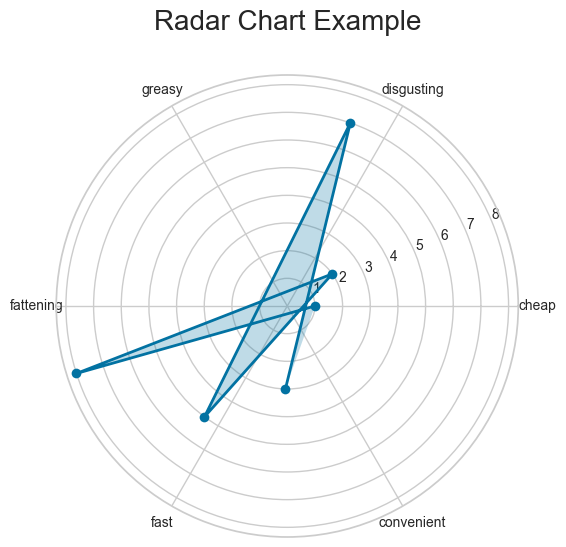

In [43]:
import matplotlib.pyplot as plt

angles = np.arange(0, 360, 360/6)

data = [1, 8, 2, 5, 7, 3]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, data, 'o-', linewidth=2)
ax.fill(angles, data, alpha=0.25)

ax.set_thetagrids(angles, ['cheap', 'disgusting', 'greasy', 'fattening', 'fast', 'convenient'])

ax.set_title('Radar Chart Example', fontsize=20, fontweight=0, y=1.08)

plt.show()


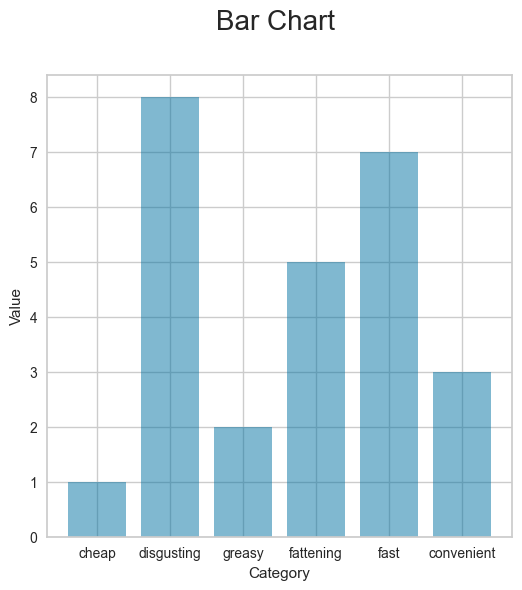

In [45]:
import matplotlib.pyplot as plt

data = {'cheap': 1, 'disgusting': 8, 'greasy': 2, 'fattening': 5, 'fast': 7, 'convenient': 3}

fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(data.keys(), data.values(), align='center', alpha=0.5)

ax.set_title('Bar Chart ', fontsize=20, fontweight=0, y=1.08)

ax.set_xlabel('Category')
ax.set_ylabel('Value')

plt.show()

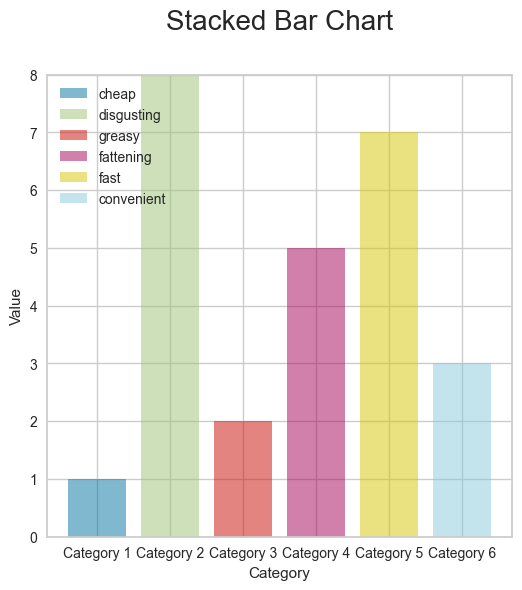

In [47]:
import matplotlib.pyplot as plt

data = {'cheap': [1, 0, 0, 0, 0, 0],
        'disgusting': [0, 8, 0, 0, 0, 0],
        'greasy': [0, 0, 2, 0, 0, 0],
        'fattening': [0, 0, 0, 5, 0, 0],
        'fast': [0, 0, 0, 0, 7, 0],
        'convenient': [0, 0, 0, 0, 0, 3]}

categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6']

fig, ax = plt.subplots(figsize=(6, 6))

y_pos = np.arange(len(categories))
ax.bar(y_pos, data['cheap'], align='center', alpha=0.5, label='cheap')
ax.bar(y_pos, data['disgusting'], bottom=data['cheap'], align='center', alpha=0.5, label='disgusting')
ax.bar(y_pos, data['greasy'], bottom=[data['cheap'][i] + data['disgusting'][i] for i in range(len(categories))], align='center', alpha=0.5, label='greasy')
ax.bar(y_pos, data['fattening'], bottom=[data['cheap'][i] + data['disgusting'][i] + data['greasy'][i] for i in range(len(categories))], align='center', alpha=0.5, label='fattening')
ax.bar(y_pos, data['fast'], bottom=[data['cheap'][i] + data['disgusting'][i] + data['greasy'][i] + data['fattening'][i] for i in range(len(categories))], align='center', alpha=0.5, label='fast')
ax.bar(y_pos, data['convenient'], bottom=[data['cheap'][i] + data['disgusting'][i] + data['greasy'][i] + data['fattening'][i] + data['fast'][i] for i in range(len(categories))], align='center', alpha=0.5, label='convenient')

ax.set_title('Stacked Bar Chart', fontsize=20, fontweight=0, y=1.08)

ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_xticks(y_pos)
ax.set_xticklabels(categories)

ax.legend(loc='upper left')

plt.show()

In [49]:
kmeans=KMeans(n_clusters=4,init='k-means++')
y_kmeans=kmeans.fit_predict(df_encoded)

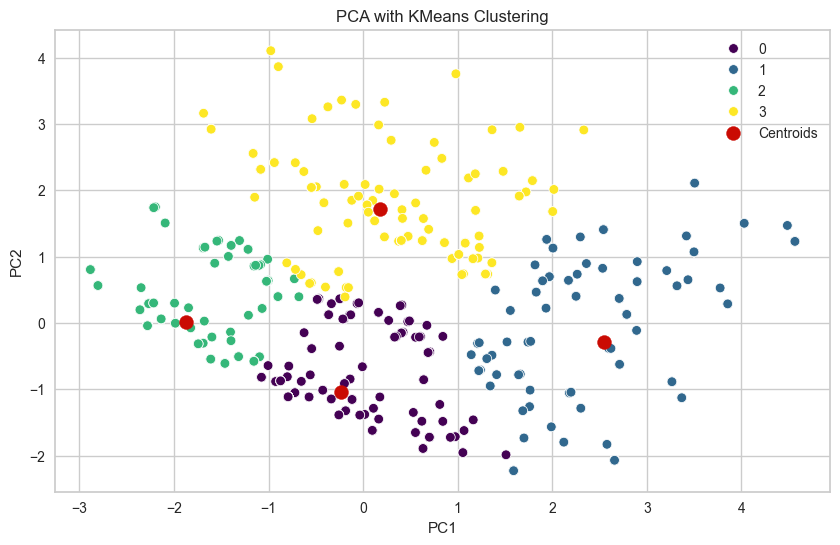

In [56]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pc = pca.fit_transform(pca_data)
names = ['PC1', 'PC2']
pf = pd.DataFrame(data=pc, columns=names)

# Assuming kmeans is your KMeans model
kmeans = KMeans(n_clusters=4, random_state=0).fit(pf)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pf, hue=kmeans.labels_, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', s=100, label='Centroids')
plt.legend()
plt.title('PCA with KMeans Clustering')
plt.show()


In [61]:
df_x=pd.get_dummies(d.drop(columns=['Like','Age','VisitFrequency','Gender'],axis=1),drop_first=True,dtype=int)
df_x

,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


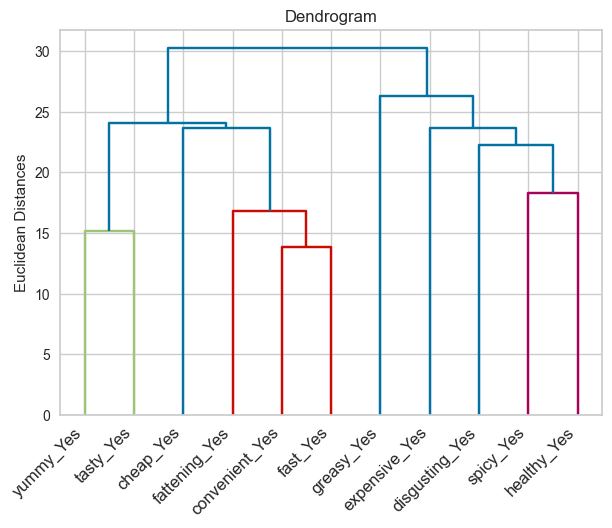

In [65]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(df_x.T, method='average')
dendrogram = sch.dendrogram(data, labels=df_x.columns[:11])

# Plotting
plt.title('Dendrogram')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.ylabel('Euclidean Distances')
plt.show()

In [72]:
d['cluster_num']=kmeans.labels_

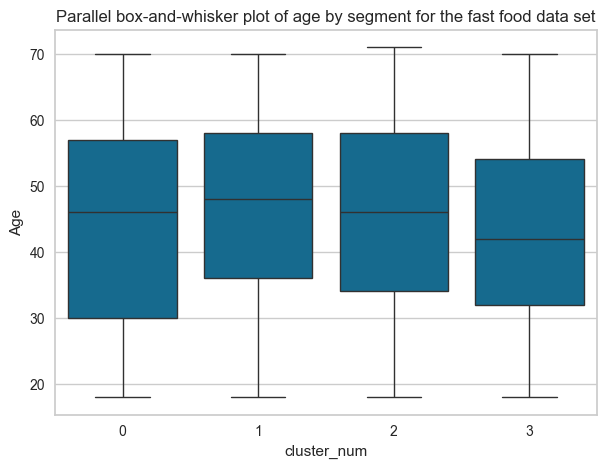

In [73]:
sns.boxplot(x=d['cluster_num'],y=d['Age'])
plt.title('Parallel box-and-whisker plot of age by segment for the fast food data set')
plt.show()

In [70]:
gmm = GaussianMixture(n_components=4, n_init=10)
df_m4 = gmm.fit(df_x)
print(df_m4.means_)

[[0.10426544 0.85308054 0.07109005 0.71090046 0.         0.86729857
  0.52606633 0.10900479 0.33649289 0.1421801  0.27014217]
 [0.68619385 1.         0.12552381 1.         0.85564479 0.93305459
  0.62970714 1.         0.36820131 0.15481145 0.18409961]
 [1.         0.97549009 0.07843019 0.73284177 0.         0.9387253
  0.69117677 1.         0.25735182 0.39460939 0.        ]
 [0.12640449 0.73876405 0.08146067 0.93539326 1.         0.83146067
  0.49438202 0.0758427  0.47191011 0.06741573 0.58426966]]


In [75]:
le=LabelEncoder()
d['Like']=le.fit_transform(d[['Like']])

In [76]:
d['Like_n'] = 6 - d['Like'].astype(int)
formula = 'Like_n ~ ' + ' + '.join(d.columns[:11])
df_reg2 = smf.ols(formula, data=d).fit()
print(df_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     24.12
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           4.32e-46
Time:                        23:55:08   Log-Likelihood:                -3736.2
No. Observations:                1453   AIC:                             7496.
Df Residuals:                    1441   BIC:                             7560.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3496      0.46

In [78]:
le=LabelEncoder()
d['VisitFrequency']=le.fit_transform(d[['VisitFrequency']])

In [80]:
Like=d.groupby('cluster_num')['Like'].mean()
Like=Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.166302
1,1,7.101010
2,2,4.010610
3,3,3.763975


In [82]:
le=LabelEncoder()
d['Gender']=le.fit_transform(d[['Gender']])
Gender=d.groupby('cluster_num')['Gender'].mean()
Gender=Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.424508
1,1,0.511785
2,2,0.381963
3,3,0.543478


In [83]:
le=LabelEncoder()
d['VisitFrequency']=le.fit_transform(d[['VisitFrequency']])
visit_freq=d.groupby('cluster_num')['VisitFrequency'].mean()
visit_freq=visit_freq.to_frame().reset_index()
visit_freq

,cluster_num,VisitFrequency
0,0,2.695842
1,1,2.723906
2,2,2.551724
3,3,2.577640


In [84]:
segment=pd.merge(Like,visit_freq,on='cluster_num',how='left').merge(Gender,on='cluster_num',how='left')
segment

,cluster_num,Like,VisitFrequency,Gender
0,0,4.166302,2.695842,0.424508
1,1,7.101010,2.723906,0.511785
2,2,4.010610,2.551724,0.381963
3,3,3.763975,2.577640,0.543478
